<a href="https://colab.research.google.com/github/hdeza/temperature_model_prediction/blob/main/entrenoModeloTemperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install meteostat

In [ ]:
from datetime import datetime
from meteostat import Point, Daily

In [ ]:
start = datetime(2010, 1, 1)
end = datetime(2024, 9, 28)

In [ ]:
# Now you can simply specify any geographical location using the Point class.
# The class constructor takes three parameters:
# Latitude
# Longitude
# Elevation
latitude = -4.2153
longitude = -69.9406
ciudad = Point(latitude, longitude)

In [ ]:
data = Daily(ciudad, start, end)
data = data.fetch()

In [ ]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2010-01-01,27.2,23.0,NaN,24.9,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,27.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,25.7,23.9,33.4,0.5,NaN,NaN,3.8,NaN,NaN,NaN
2010-01-04,26.2,23.8,31.0,2.0,NaN,NaN,3.3,NaN,NaN,NaN
2010-01-05,26.8,22.8,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-24,27.2,23.8,37.0,0.0,NaN,355.0,6.0,NaN,1009.0,NaN
2024-09-25,28.7,22.0,37.0,0.3,NaN,13.0,6.3,NaN,1008.0,NaN
2024-09-26,27.1,23.5,35.0,9.0,NaN,42.0,5.2,NaN,1008.8,NaN


In [ ]:
data.isnull().sum()

,0
tavg,0
tmin,433
tmax,609
prcp,1414
snow,5385
wdir,3976
wspd,1222
wpgt,5385
pres,4015
tsun,5385


In [ ]:
# Aqui se opta por eliminar las filas con las wdir, prcp y pres en NaN ya que están seguidas
# y así se puede evitar un mal entrenamiento por datos confusos
dataN = data.dropna(subset=['prcp','wdir','wspd','pres','tmin','tmax','tavg']).copy()

In [ ]:
# # El metodo fillna se usa para rellenar los valores faltantes (NaN en un Dataframe o una serie)
# # data['wpgt'] = data['wpgt'].fillna(0.0)
# # data['prcp'] = data['prcp'].fillna(0.0)

# #Ahora se usa la interpolación para rellenar los NaN ya que la temperatura minima
# # suele ser un valor lineal
# dataN['tmin'] = dataN['tmin'].interpolate(method='linear')
# dataN['tmax'] = dataN['tmax'].interpolate(method='linear')
# dataN['tavg'] = dataN['tavg'].interpolate(method='linear')



In [ ]:
# dataN['wdir_rad'] = np.deg2rad(dataN['wdir'])
# dataN['wdir_cos'] = np.cos(dataN['wdir_rad'])
# dataN['wdir_sin'] = np.sin(dataN['wdir_rad'])
dataN['latitude'] = latitude
dataN['longitude'] = longitude

In [ ]:
dataN = dataN.drop(['snow','tsun','wpgt'],axis=1).copy()

In [ ]:
dataN['temperature_tomorrow'] = dataN['tavg'].shift(-1)
dataN = dataN.drop(dataN.index[-1]).copy()

In [ ]:
dataN.describe()

,tavg,tmin,tmax,prcp,wdir,wspd,pres,latitude,longitude,temperature_tomorrow
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.0000,1356.0000,1356.000000
mean,25.967552,22.631637,31.367330,8.715413,176.960177,4.295649,1010.631268,-4.2153,-69.9406,25.967404
std,1.217726,1.369190,2.307377,12.343567,148.241560,1.323621,1.983860,0.0000,0.0000,1.217783
min,17.300000,2.000000,19.000000,0.000000,0.000000,0.200000,1004.300000,-4.2153,-69.9406,17.300000
25%,25.300000,22.000000,30.000000,0.500000,23.000000,3.400000,1009.400000,-4.2153,-69.9406,25.300000
50%,26.000000,23.000000,31.800000,5.000000,168.000000,4.200000,1010.500000,-4.2153,-69.9406,26.000000
75%,26.700000,23.325000,33.000000,12.225000,336.000000,5.000000,1011.700000,-4.2153,-69.9406,26.700000
max,29.900000,25.400000,39.500000,120.900000,360.000000,10.900000,1018.600000,-4.2153,-69.9406,29.900000


In [ ]:
dataN

,tavg,tmin,tmax,prcp,wdir,wspd,pres,latitude,longitude,temperature_tomorrow
time,,,,,,,,,,
2021-01-02,25.6,23.0,30.0,17.6,291.0,5.5,1010.9,-4.2153,-69.9406,26.2
2021-01-03,26.2,23.0,30.0,8.0,346.0,4.9,1009.4,-4.2153,-69.9406,24.6
2021-01-04,24.6,23.0,29.0,8.5,40.0,5.4,1008.5,-4.2153,-69.9406,24.8
2021-01-05,24.8,22.0,31.0,3.3,45.0,3.7,1008.5,-4.2153,-69.9406,23.9
2021-01-06,23.9,22.8,25.0,27.1,49.0,4.8,1011.0,-4.2153,-69.9406,24.8
...,...,...,...,...,...,...,...,...,...,...
2024-09-23,27.5,23.0,34.0,0.9,283.0,6.3,1009.2,-4.2153,-69.9406,27.2
2024-09-24,27.2,23.8,37.0,0.0,355.0,6.0,1009.0,-4.2153,-69.9406,28.7
2024-09-25,28.7,22.0,37.0,0.3,13.0,6.3,1008.0,-4.2153,-69.9406,27.1


In [ ]:
dataN.dtypes

,0
tavg,float64
tmin,float64
tmax,float64
prcp,float64
wdir,float64
wspd,float64
pres,float64
latitude,float64
longitude,float64
temperature_tomorrow,float64


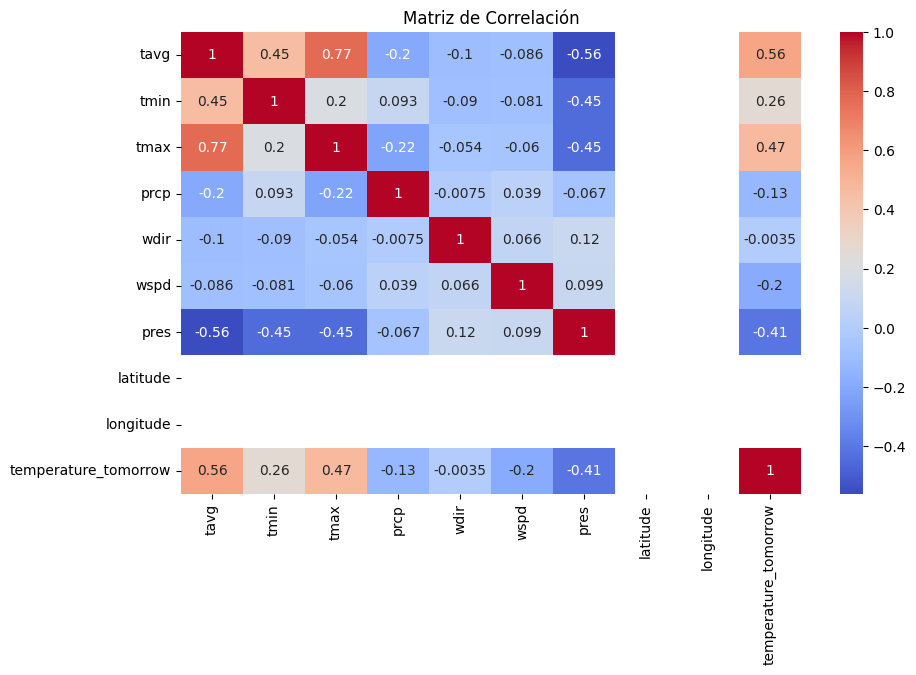

,tavg,tmin,tmax,prcp,wdir,wspd,pres,latitude,longitude,temperature_tomorrow
tavg,1.000000,0.451875,0.770564,-0.197691,-0.100490,-0.086173,-0.562009,NaN,NaN,0.563215
tmin,0.451875,1.000000,0.196549,0.092995,-0.090084,-0.080835,-0.446593,NaN,NaN,0.257920
tmax,0.770564,0.196549,1.000000,-0.221083,-0.053631,-0.059847,-0.450904,NaN,NaN,0.469152
prcp,-0.197691,0.092995,-0.221083,1.000000,-0.007538,0.038686,-0.067032,NaN,NaN,-0.125342
wdir,-0.100490,-0.090084,-0.053631,-0.007538,1.000000,0.066463,0.115141,NaN,NaN,-0.003472
wspd,-0.086173,-0.080835,-0.059847,0.038686,0.066463,1.000000,0.098791,NaN,NaN,-0.195102
pres,-0.562009,-0.446593,-0.450904,-0.067032,0.115141,0.098791,1.000000,NaN,NaN,-0.412358
latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature_tomorrow,0.563215,0.257920,0.469152,-0.125342,-0.003472,-0.195102,-0.412358,NaN,NaN,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Hacemos que solo conserve las columnas con datos numericos tipo float omitiendo los datos del nombre de la ciudad
numericDataN = dataN.select_dtypes(include=['float64'])
# Generar la matriz de correlación
corr_matrix = numericDataN.corr()
# Visualizar con un heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()
corr_matrix

In [ ]:
dataN.isnull().sum()

,0
tavg,0
tmin,0
tmax,0
prcp,0
wdir,0
wspd,0
pres,0
latitude,0
longitude,0
temperature_tomorrow,0


In [ ]:
dataN.to_csv('leticia_weather.csv',index=False)
dataN

,tavg,tmin,tmax,prcp,wdir,wspd,pres,latitude,longitude,temperature_tomorrow
time,,,,,,,,,,
2021-01-02,25.6,23.0,30.0,17.6,291.0,5.5,1010.9,-4.2153,-69.9406,26.2
2021-01-03,26.2,23.0,30.0,8.0,346.0,4.9,1009.4,-4.2153,-69.9406,24.6
2021-01-04,24.6,23.0,29.0,8.5,40.0,5.4,1008.5,-4.2153,-69.9406,24.8
2021-01-05,24.8,22.0,31.0,3.3,45.0,3.7,1008.5,-4.2153,-69.9406,23.9
2021-01-06,23.9,22.8,25.0,27.1,49.0,4.8,1011.0,-4.2153,-69.9406,24.8
...,...,...,...,...,...,...,...,...,...,...
2024-09-23,27.5,23.0,34.0,0.9,283.0,6.3,1009.2,-4.2153,-69.9406,27.2
2024-09-24,27.2,23.8,37.0,0.0,355.0,6.0,1009.0,-4.2153,-69.9406,28.7
2024-09-25,28.7,22.0,37.0,0.3,13.0,6.3,1008.0,-4.2153,-69.9406,27.1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X = dataN.drop('temperature_tomorrow', axis=1)
Y = dataN['temperature_tomorrow']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1220, 9), (136, 9), (1220,), (136,))

In [ ]:
model = RandomForestRegressor(n_estimators=300, max_depth=15, min_samples_split=5, random_state=42)

In [ ]:
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=300,
                      random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = model.score(X_test, Y_test)
print("R-squared:", r2)

Mean Squared Error: 1.2108431954636345
R-squared: 0.10208229117871703


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, y_pred)
print(f'MAE: {mae}')

MAE: 0.8755404569721814


In [ ]:
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 1.100383203917451


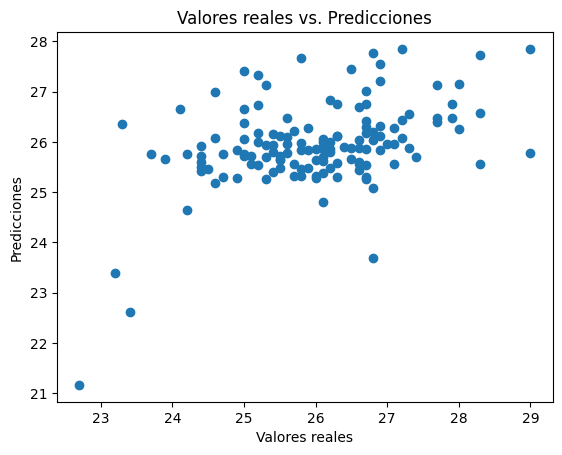

In [ ]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.show()

Aqui vamos a probar el modelo

In [ ]:
# Set time period
start = datetime(2024, 9, 27)
end = datetime(2024, 9, 28)
ciudad_prueba = Point(11.24079, -74.19904)
# Get daily data
data = Daily(ciudad_prueba, start, end)
data = data.fetch()
data = data.drop(['snow','tsun','wpgt'],axis=1).copy()
data['latitude'] = 11.24079
data['longitude'] = -74.19904
data['temperatura_tomorrow'] = data['tavg'].shift(-1)
data = data.drop(data.index[-1]).copy()
data

,tavg,tmin,tmax,prcp,wdir,wspd,pres,latitude,longitude,temperatura_tomorrow
time,,,,,,,,,,
2024-09-27,27.8,24.3,34.0,7.5,166.0,13.3,1011.3,11.24079,-74.19904,26.7


In [ ]:
data_dia = {
    'tavg': [27.8],
    'tmin': [24.3],
    'tmax': [34.0],
    'prcp': [7.5],
    'wdir': [166.0],
    'wspd': [13.3],
    'pres': [1011.3],
    'latitude': [11.24079],
    'longitude': [-74.19904]
}
df_dia = pd.DataFrame(data_dia)
df_dia

,tavg,tmin,tmax,prcp,wdir,wspd,pres,latitude,longitude
0,27.8,24.3,34.0,7.5,166.0,13.3,1011.3,11.24079,-74.19904


In [ ]:
predicciones = []

for i in range(5):
    prediccion = model.predict(df_dia)[0]
    predicciones.append(prediccion)
    df_dia['tavg'] = [prediccion]

    # Precipitación (ajustar ligeramente con variabilidad)
    df_dia['prcp'] = [df_dia['prcp'][0] + np.random.normal(0, 1)]  # Añadir ruido aleatorio

    # Velocidad del viento (uso de medias históricas)
    df_dia['wspd'] = [max(0, df_dia['wspd'][0] + np.random.normal(0, 0.5))]  # Asegurar que sea >= 0

    # Presión (usando tendencias, simulando pequeños cambios diarios)
    df_dia['pres'] = [df_dia['pres'][0] + np.random.normal(0, 0.2)]

    # Dirección del viento (mantener valores entre 0 y 360 grados)
    df_dia['wdir'] = [(df_dia['wdir'][0] + np.random.normal(0, 10)) % 360]

In [ ]:
# Mostrar las predicciones para los próximos 5 días
for i, temp in enumerate(predicciones):
    print(f"Predicción día {i+1}: {temp:.2f} °C")

Predicción día 1: 26.68 °C
Predicción día 2: 25.72 °C
Predicción día 3: 23.76 °C
Predicción día 4: 22.80 °C
Predicción día 5: 21.03 °C


In [ ]:
prediccion = model.predict(df_dia)
print(f'La temperatura predicha para mañana es: {prediccion[0]} grados Celsius')

La temperatura predicha para mañana es: 20.75134120971623 grados Celsius


# Entrenamos el modelo con todos los datos de las ciudades

Ahora teniendo todos los nuevos datasets de cada ciudad elegida vamos a unificar las ciudades de colombia y crear un nuevo dataset

In [ ]:
#cargamos todos los csv de las ciudades
dfBogota = pd.read_csv('bogota_weather.csv')
dfCali = pd.read_csv('cali_weather.csv')
dfCartagena = pd.read_csv('cartagena_weather.csv')
dfGuatape = pd.read_csv('guatape_weather.csv')
dfMedellin = pd.read_csv('medellin_weather.csv')
dfSalento = pd.read_csv('salento_weather.csv')
dfsanandres = pd.read_csv('sanandres_weather.csv')
dfSantaMarta = pd.read_csv('santamarta_weather.csv')

In [ ]:
dataframes = [dfBogota, dfCali, dfCartagena, dfGuatape, dfMedellin, dfSalento, dfsanandres, dfSantaMarta]
#Unimos todos los dataframes
df_unificado = pd.concat(dataframes, ignore_index=True)

In [ ]:
df_unificado

,tavg,tmin,tmax,prcp,wdir,wspd,pres,latitude,longitude,temperature_tomorrow
0,13.9,8.2,20.0,0.0,65.0,10.4,1017.0,4.60971,-74.08175,14.0
1,14.0,8.0,19.3,2.0,81.0,11.0,1018.6,4.60971,-74.08175,14.6
2,14.6,10.0,19.7,0.0,138.0,14.3,1018.2,4.60971,-74.08175,14.4
3,14.4,10.5,19.0,0.5,87.0,12.2,1018.4,4.60971,-74.08175,13.6
4,13.6,8.9,19.1,2.0,68.0,10.8,1017.8,4.60971,-74.08175,14.8
...,...,...,...,...,...,...,...,...,...,...
12374,30.8,26.0,37.0,0.1,42.0,10.8,1010.2,11.24079,-74.19904,38.2
12375,29.9,23.1,38.2,1.0,140.0,9.9,1010.0,11.24079,-74.19904,37.7
12376,30.0,25.4,37.7,0.0,336.0,11.4,1010.0,11.24079,-74.19904,34.4
12377,28.8,25.6,34.4,0.0,118.0,9.3,1011.0,11.24079,-74.19904,35.3


In [ ]:
df_unificado.to_csv('weather_unificado.csv',index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X = df_unificado.drop('temperature_tomorrow', axis=1)
Y = df_unificado['temperature_tomorrow']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((9903, 9), (2476, 9), (9903,), (2476,))

In [ ]:
model = RandomForestRegressor(n_estimators=500, max_depth=15, min_samples_split=5, random_state=42)

In [ ]:
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=500,
                      random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = model.score(X_test, Y_test)
print("R-squared:", r2)

Mean Squared Error: 1.4565353365614728
R-squared: 0.9623415136782334


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, y_pred)
print(f'MAE: {mae}')

MAE: 0.826461338387339


In [ ]:
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 1.2068700578610245


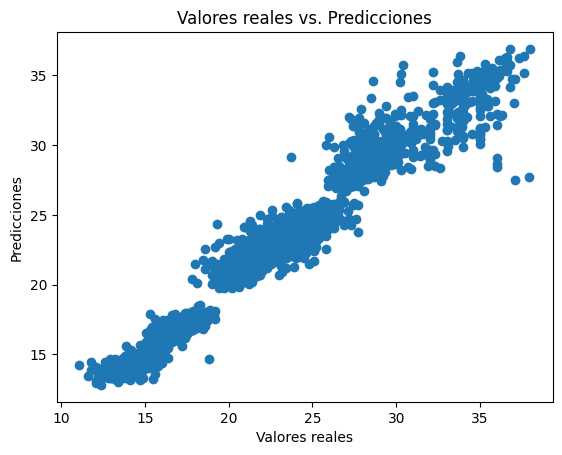

In [ ]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.show()

In [ ]:
import joblib

joblib.dump(model, 'modelo_temperatura.pkl')

['modelo_temperatura.pkl']

## Revisamos el dataset completo

In [ ]:
datos_unificados = pd.read_csv('weather_unificado.csv')
datos_unificados

,tavg,tmin,tmax,prcp,wdir,wspd,pres,latitude,longitude,temperature_tomorrow
0,13.9,8.2,20.0,0.0,65.0,10.4,1017.0,4.60971,-74.08175,14.0
1,14.0,8.0,19.3,2.0,81.0,11.0,1018.6,4.60971,-74.08175,14.6
2,14.6,10.0,19.7,0.0,138.0,14.3,1018.2,4.60971,-74.08175,14.4
3,14.4,10.5,19.0,0.5,87.0,12.2,1018.4,4.60971,-74.08175,13.6
4,13.6,8.9,19.1,2.0,68.0,10.8,1017.8,4.60971,-74.08175,14.8
...,...,...,...,...,...,...,...,...,...,...
12374,30.8,26.0,37.0,0.1,42.0,10.8,1010.2,11.24079,-74.19904,38.2
12375,29.9,23.1,38.2,1.0,140.0,9.9,1010.0,11.24079,-74.19904,37.7
12376,30.0,25.4,37.7,0.0,336.0,11.4,1010.0,11.24079,-74.19904,34.4
12377,28.8,25.6,34.4,0.0,118.0,9.3,1011.0,11.24079,-74.19904,35.3
